In [6]:
import platform
import torch

def showinfo(tip, info):
    print("{}:{}".format(tip,info))

showinfo("操作系统及版本信息",platform.platform())
showinfo('系统位数', platform.architecture())
showinfo('pytorch版本', torch.__version__)
showinfo('cuda版本', torch.version.cuda)
showinfo('cudnn版本', torch.backends.cudnn.version())

操作系统及版本信息:Linux-5.15.153.1-microsoft-standard-WSL2-x86_64-with-glibc2.35
系统位数:('64bit', 'ELF')
pytorch版本:2.3.0
cuda版本:12.1
cudnn版本:8902


## 数学基础：
高等数学：导数、微分、偏导数（多元函数导数）

线性代数：向量、行列式、矩阵的基本运算、秩

# 高等数学
## 导数
$$
f'(x_0) = \frac{dy}{dx} = \lim_{x \to x_0} \frac{f(x) - f(x_0)}{x - x_0}
$$

## 极限
ε δ 语言：
函数 $f(x)$ 在点 $x_0$ 的某一去心邻域内有定义。如果存在常数 $a$，对于任意的 $\epsilon > 0$，都存在 $\delta > 0$，使得在 $0 < |x - x_0| < \delta$ 时，不等式 $|f(x) - a| < \epsilon$ 恒成立。那么常数 $a$ 就叫做函数 $f(x)$ 当 $x \to x_0$ 时的极限，记作：
$$
\lim_{x \to x_0} f(x) = a
$$

## 微分
函数变化量 = 变化率 * 参数变化量
$$
df(x) = f'(x) \, dx
$$

## 偏导
对于一个多元函数 $f(x_1, x_2, \ldots, x_n)$，它在点 $(x_1^0, x_2^0, \ldots, x_n^0)$ 处的偏导数相对于 $x_i$ 是：
$$
\frac{\partial f}{\partial x_i} = \lim_{h \to 0} \frac{f(x_1^0, \ldots, x_i^0 + h, \ldots, x_n^0) - f(x_1^0, \ldots, x_i^0, \ldots, x_n^0)}{h}
$$

### 偏导的链式法则
假设我们有两个函数 $u = g(x_1, x_2, \ldots, x_n)$ 和 $y = f(u)$，其中 $u$ 是 $x_1, x_2, \ldots, x_n$ 的函数，而 $y$ 是 $u$ 的函数。我们希望找到 $y$ 对 $x_i$ 的偏导数。

**链式法则**的定义是：

$$
\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial u} \cdot \frac{\partial u}{\partial x_i}
$$

其中：
- $\frac{\partial y}{\partial u}$ 是 $y$ 对 $u$ 的偏导数。
- $\frac{\partial u}{\partial x_i}$ 是 $u$ 对 $x_i$ 的偏导数。

### 证明
全微分关系为：
$$ dz = \frac{\partial z}{\partial u} \, du + \frac{\partial z}{\partial v} \, dv $$

由于 $u$ 和 $v$ 是 $x$ 和 $y$ 的函数，我们有：
$$ du = \frac{\partial u}{\partial x} \, dx + \frac{\partial u}{\partial y} \, dy $$
$$ dv = \frac{\partial v}{\partial x} \, dx + \frac{\partial v}{\partial y} \, dy $$

将这些代入全微分公式中，得到：
$$ dz = \left( \frac{\partial z}{\partial u} \frac{\partial u}{\partial x} + \frac{\partial z}{\partial v} \frac{\partial v}{\partial x} \right) dx + \left( \frac{\partial z}{\partial u} \frac{\partial u}{\partial y} + \frac{\partial z}{\partial v} \frac{\partial v}{\partial y} \right) dy $$

### 链式法则的偏导数

根据全微分关系，链式法则的偏导数为：
$$ \frac{\partial z}{\partial x} = \frac{\partial z}{\partial u} \frac{\partial u}{\partial x} + \frac{\partial z}{\partial v} \frac{\partial v}{\partial x} $$
$$ \frac{\partial z}{\partial y} = \frac{\partial z}{\partial u} \frac{\partial u}{\partial y} + \frac{\partial z}{\partial v} \frac{\partial v}{\partial y} $$

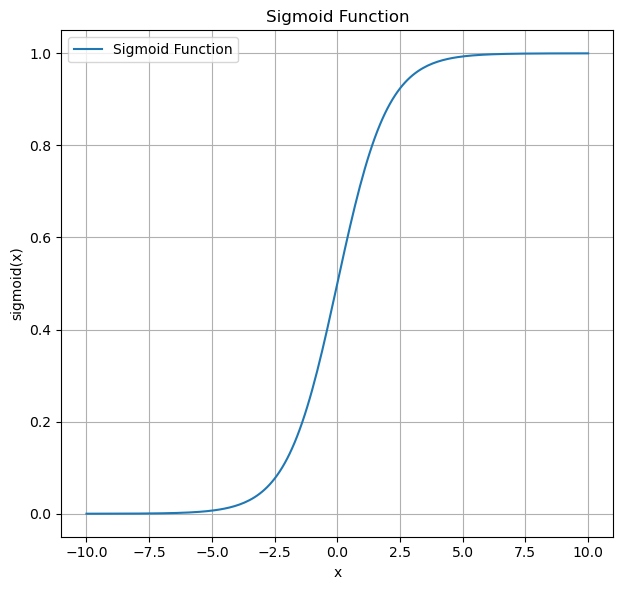

In [15]:
## 常见的激活函数 & 损失函数 - sigmoid

'''
特点：
Sigmoid 函数的输出范围是 0 到 1，由于输出值限定在 0 到 1，因此它对每个神经元的输出进行了归一化
用于将预测概率作为输出的模型，由于概率的取值范围是 0 到 1，因此 Sigmoid 函数非常合适
梯度平滑，避免「跳跃」的输出值
函数是可微的。这意味着可以找到任意两个点的 sigmoid 曲线的斜率

缺点：
倾向于梯度消失
函数输出不是以 0 为中心的，这会降低权重更新的效率
Sigmoid 函数执行指数运算，计算机运行得较慢
'''
e = 2.713
def sigmoid(x):
    return 1 / (1 + (e**(-1 * x)))

def sigmoid_fac(x):
    return sigmoid(x) * (1 - sigmoid(x))

x = [i * 0.1 for i in range(-100, 101)]  # Generating values from -10 to 10 with step 0.1
sigmoid_values = [sigmoid(i) for i in x]

import matplotlib.pyplot as plt
# Create plots
plt.figure(figsize=(12, 6))

# Plot sigmoid function
plt.subplot(1, 2, 1)
plt.plot(x, sigmoid_values, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

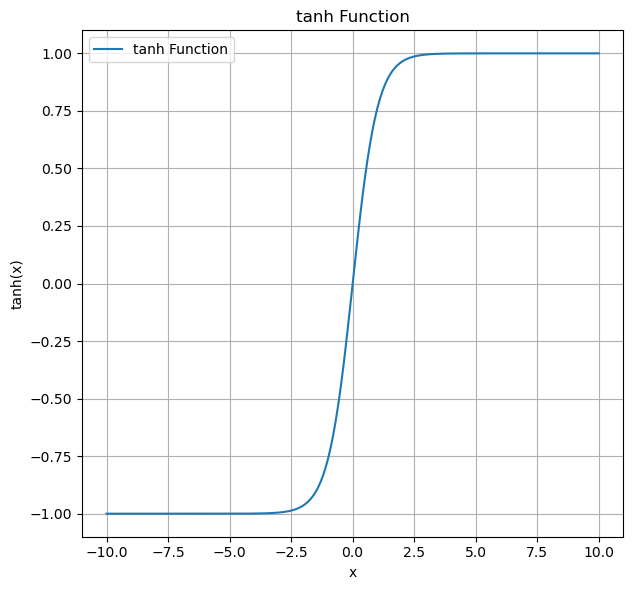

In [16]:
## 常见的激活函数 & 损失函数 - Tanh

'''
特点：
和sigmoid的区别在于输出间隔，tanh 的输出间隔为 1，并且整个函数以 0 为中心，比 sigmoid 函数更好
负输入将被强映射为负，而零输入被映射为接近零

缺点：
当输入较大或较小时，输出几乎是平滑的并且梯度较小，这不利于权重更新
'''
e = 2.713
def tanh(x):
    return ((e ** x) - (e ** (-1 * x))) / ((e ** x) + (e ** (-1 * x))) 

def tanh_fac(x):
    return 1 - (tanh(x) ** 2)

x = [i * 0.1 for i in range(-100, 101)]  # Generating values from -10 to 10 with step 0.1
tanh_values = [tanh(i) for i in x]

import matplotlib.pyplot as plt
# Create plots
plt.figure(figsize=(12, 6))

# Plot sigmoid function
plt.subplot(1, 2, 1)
plt.plot(x, tanh_values, label='tanh Function')
plt.title('tanh Function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

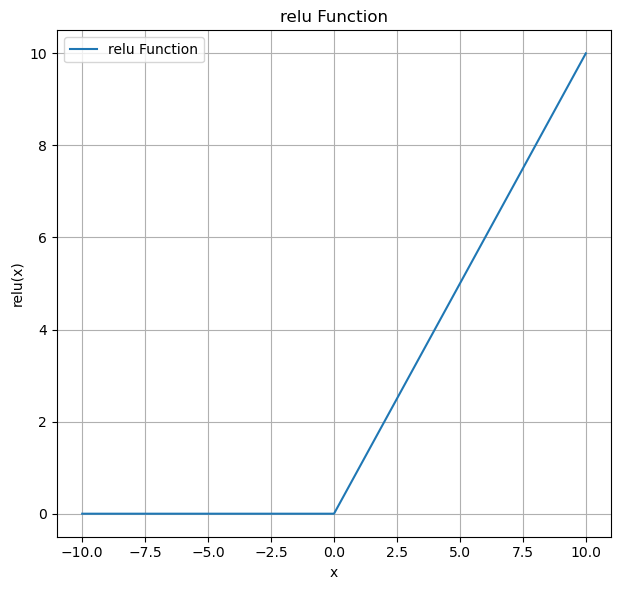

In [18]:
## 常见的激活函数 & 损失函数 - ReLU
'''
深度学习中较为流行的一种激活函数
特点：
输入为正时，不存在梯度饱和问题
ReLU 函数中只存在线性关系，因此它的计算速度比 sigmoid 和 tanh 更快

缺点
在反向传播过程中，如果输入负数，则梯度将完全为零
ReLU 函数的输出为 0 或正数，这意味着 ReLU 函数不是以 0 为中心的函数
'''
def relu(x):
    return x if x >= 0 else 0
    
def relu_fac(x):
    return 1 if x >= 0 else 0

x = [i * 0.1 for i in range(-100, 101)]  # Generating values from -10 to 10 with step 0.1
relu_values = [relu(i) for i in x]

import matplotlib.pyplot as plt
# Create plots
plt.figure(figsize=(12, 6))

# Plot sigmoid function
plt.subplot(1, 2, 1)
plt.plot(x, relu_values, label='relu Function')
plt.title('relu Function')
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
## 常见的激活函数 & 损失函数 - SoftMax

'''
特点：
用于多类分类问题的激活函数，在多类分类问题中，超过两个类标签则需要类成员关系。
对于长度为 K 的任意实向量，Softmax 可以将其压缩为长度为 K，值在（0，1）范围内，并且向量中元素的总和为 1 的实向量。

缺点：
在零点不可微
负输入的梯度为零，这意味着对于该区域的激活，权重不会在反向传播期间更新，因此会产生永不激活的死亡神经元
'''
def softmax(x):
    max_x = max(x)
    exp_x = [math.exp(i - max_x) for i in x]
    sum_exp_x = sum(exp_x)
    return [i / sum_exp_x for i in exp_x]

def softmax_jacobian(x):
    """
    Computes the Jacobian matrix of the softmax function.
    """
    s = softmax(x)  # Softmax result
    n = len(x)  # Number of elements
    
    # Initialize Jacobian matrix
    J = [[0] * n for _ in range(n)]
    
    for i in range(n):
        for j in range(n):
            if i == j:
                # Diagonal element
                J[i][j] = s[i] * (1 - s[i])
            else:
                # Off-diagonal element
                J[i][j] = -s[i] * s[j]
                
    return J

# 线性代数
## 向量的定义

**向量**是一个具有大小和方向的量，通常在多维空间中表示为一个有序的数列。一个 $n$ 维向量可以写作：

$$
\mathbf{v} = \begin{bmatrix}
v_1 \\
v_2 \\
\vdots \\
v_n
\end{bmatrix}
$$

## 行列式的定义

**行列式**是一个方阵的一个标量值，它可以用来描述矩阵的某些性质，比如可逆性。对于一个 $n \times n$ 的方阵 $A$，行列式记作 $\det(A)$ 或 $|A|$，可以表示为：

对于 $2 \times 2$ 矩阵：

$$
\det \begin{pmatrix}
a & b \\
c & d
\end{pmatrix} = ad - bc
$$

对于 $3 \times 3$ 矩阵：

$$
\det \begin{pmatrix}
a & b & c \\
d & e & f \\
g & h & i
\end{pmatrix} = aei + bfg + cdh - ceg - bdi - afh
$$

## 矩阵的定义

**矩阵**是一个按照矩形阵列排列的数值集合。一个 $m \times n$ 的矩阵可以表示为：

$$
A = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix}
$$

## 矩阵的基本运算
### 1. 矩阵加法
两个同型矩阵 $A$ 和 $B$ 的加法是元素对应相加，得到的新矩阵为：
如果
$$
A = \begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
$$
$$
B = \begin{bmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22}
\end{bmatrix}
$$
那么
$$
A + B = \begin{bmatrix}
a_{11} + b_{11} & a_{12} + b_{12} \\
a_{21} + b_{21} & a_{22} + b_{22}
\end{bmatrix}
$$
### 2. 矩阵减法
两个同型矩阵 $A$ 和 $B$ 的减法是元素对应相减，得到的新矩阵为：
$$
A - B = \begin{bmatrix}
a_{11} - b_{11} & a_{12} - b_{12} \\
a_{21} - b_{21} & a_{22} - b_{22}
\end{bmatrix}
$$
### 3. 矩阵数乘
矩阵 $A$ 与标量 $k$ 的数乘是矩阵中每个元素都乘以 $k$，得到的新矩阵为：
如果
$$
A = \begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
$$
那么
$$
kA = \begin{bmatrix}
ka_{11} & ka_{12} \\
ka_{21} & ka_{22}
\end{bmatrix}
$$
### 4. 矩阵乘法
两个矩阵 $A$ 和 $B$ 的乘法是矩阵 $A$ 的行向量与矩阵 $B$ 的列向量的内积，得到的新矩阵 $C$ 为：
如果
$$
A = \begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
$$
$$
B = \begin{bmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22}
\end{bmatrix}
$$
那么
$$
C = AB = \begin{bmatrix}
a_{11}b_{11} + a_{12}b_{21} & a_{11}b_{12} + a_{12}b_{22} \\
a_{21}b_{11} + a_{22}b_{21} & a_{21}b_{12} + a_{22}b_{22}
\end{bmatrix}
$$
### 5. 矩阵转置
矩阵 $A$ 的转置是将矩阵 $A$ 的行和列互换得到的新矩阵 $A^T$：
如果
$$
A = \begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
$$
那么
$$
A^T = \begin{bmatrix}
a_{11} & a_{21} \\
a_{12} & a_{22}
\end{bmatrix}
$$
### 6. 矩阵的逆
矩阵 $A$ 的逆矩阵 $A^{-1}$ 是使得 $AA^{-1} = A^{-1}A = I$ 的矩阵，其中 $I$ 是单位矩阵。对于 $2 \times 2$ 矩阵 $A$，如果行列式 $\det(A) \neq 0$，其逆矩阵为：
如果
$$
A = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$$
那么
$$
A^{-1} = \frac{1}{\det(A)} \begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}
$$
其中行列式 $\det(A)$ 为：
$$
\det(A) = ad - bc
$$
## 7. 矩阵的秩

**矩阵的秩**（rank）是矩阵中线性无关的行（或列）的最大数量。矩阵的秩可以用来判断矩阵的行或列的线性独立性。

对于一个 $m \times n$ 的矩阵 $A$，秩定义为：

- 矩阵 $A$ 的**行秩**：矩阵 $A$ 的最大线性无关的行的数量。
- 矩阵 $A$ 的**列秩**：矩阵 $A$ 的最大线性无关的列的数量。

行秩和列秩总是相等，这个公共值称为矩阵的秩，记作 $\text{rank}(A)$。

### 举例

假设有一个矩阵 $A$：

$$
A = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
$$

矩阵 $A$ 的秩是 $2$，因为矩阵的行或列中最大数量的线性无关的行或列是 $2$。
#### 步骤
r2 = r2 - 4*r1

r3 = r3 - 7*r1

r2 = -1/3*r2

r3 = r3 + 6*r2


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 向量定义
v = np.array([1, 2, 3])

# 行列式定义
A_2x2 = np.array([
    [1, 2],
    [3, 4]
])
det_A_2x2 = np.linalg.det(A_2x2)

A_3x3 = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
det_A_3x3 = np.linalg.det(A_3x3)

# 矩阵定义
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# 矩阵基本运算
# 1. 矩阵加法
B = np.array([
    [9, 8, 7],
    [6, 5, 4],
    [3, 2, 1]
])
matrix_sum = A + B

# 2. 矩阵减法
matrix_diff = A - B

# 3. 矩阵数乘
k = 2
matrix_scalar_mult = k * A

# 4. 矩阵乘法
C = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])
matrix_product = np.dot(A, C)

# 5. 矩阵转置
matrix_transpose = A.T

# 6. 矩阵的逆
A_inv = np.linalg.inv(A_2x2)

# 7. 矩阵的秩
matrix_rank = np.linalg.matrix_rank(A)

# 打印结果
print("向量 v:", v)
print("2x2 矩阵的行列式:", det_A_2x2)
print("3x3 矩阵的行列式:", det_A_3x3)
print("矩阵加法结果:\n", matrix_sum)
print("矩阵减法结果:\n", matrix_diff)
print("矩阵数乘结果:\n", matrix_scalar_mult)
print("矩阵乘法结果:\n", matrix_product)
print("矩阵转置结果:\n", matrix_transpose)
print("A_2X2矩阵的逆:\n", A_inv)
print("矩阵的秩:", matrix_rank)


向量 v: [1 2 3]
2x2 矩阵的行列式: -2.0000000000000004
3x3 矩阵的行列式: 6.66133814775094e-16
矩阵加法结果:
 [[10 10 10]
 [10 10 10]
 [10 10 10]]
矩阵减法结果:
 [[-8 -6 -4]
 [-2  0  2]
 [ 4  6  8]]
矩阵数乘结果:
 [[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]
矩阵乘法结果:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
矩阵转置结果:
 [[1 4 7]
 [2 5 8]
 [3 6 9]]
A_2X2矩阵的逆:
 [[-2.   1. ]
 [ 1.5 -0.5]]
矩阵的秩: 2


## 机器学习基本概念

### ml类别

#### 监督学习
有数据标注的机器学习

##### 分类问题
给出X样本，以及样本中每一行对应的标注结果集Y

根据样本特征，预测新样本的结果

##### 回归问题
给出X样本，以及样本中每一行对应的标注结果集Y

根据样本特征，预测新样本的趋势

#### 无监督学习
无数据标注的机器学习

##### 聚类问题
仅给出X样本

通过算法划分出不同的类别。

### 注：
大多数机器学习应用多属于监督学习，后续仅对knn聚类算法做了简单介绍，其他算法均为监督学习。